<a href="https://colab.research.google.com/github/yawwsh/Taxi-Duration-Predictor/blob/main/Prediction_source_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***TITLE: Taxi trip duration prediction using multiple linear regression***

# Importing The Libraries



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

## Importing the dataset and clearing extra values

In [ ]:
#importing training set
train_dataset = pd.read_csv('train.csv')
#dropping off dropoff date and time column from dataset because it is not there in test set
train_dataset = train_dataset.drop('dropoff_datetime', axis=1)
X_train = train_dataset.iloc[:,:-1].values
y_train = train_dataset.iloc[:,-1].values
#importing test set
test_dataset = pd.read_csv('test.csv')
X_test = test_dataset.iloc[:,:].values

# Taking care of Missing data

In [ ]:
#check if there is any missing value
missing_values = train_dataset.isnull().sum().sum()
print(missing_values)

0


# Data preprocessing

## Spliting date and time column in training set

In [ ]:
# Convert X_train to a DataFrame
X_train = pd.DataFrame(X_train, columns=train_dataset.columns[:-1])

# Convert the 'pickup_datetime' column to datetime type
X_train['pickup_datetime'] = pd.to_datetime(X_train['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

# Extract the date and time components
X_train['date'] = X_train['pickup_datetime'].dt.date
X_train['time'] = X_train['pickup_datetime'].dt.time

#drop original column
X_train = X_train.drop('pickup_datetime', axis=1)

print(X_train)

                id vendor_id passenger_count pickup_longitude pickup_latitude  \
0        id2875421         2               1       -73.982155       40.767937   
1        id2377394         1               1       -73.980415       40.738564   
2        id3858529         2               1       -73.979027       40.763939   
3        id3504673         2               1        -74.01004       40.719971   
4        id2181028         2               1       -73.973053       40.793209   
...            ...       ...             ...              ...             ...   
1458639  id2376096         2               4       -73.982201       40.745522   
1458640  id1049543         1               1       -74.000946       40.747379   
1458641  id2304944         2               1       -73.959129       40.768799   
1458642  id2714485         1               1       -73.982079       40.749062   
1458643  id1209952         1               1       -73.979538        40.78175   

        dropoff_longitude d

## Spliting date and time column in test set

In [ ]:
# Convert X_test to a DataFrame
X_test = pd.DataFrame(X_test, columns=train_dataset.columns[:-1])

# Convert the 'pickup_datetime' column to datetime type
X_test['pickup_datetime'] = pd.to_datetime(X_test['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

# Extract the date and time components
X_test['date'] = X_test['pickup_datetime'].dt.date
X_test['time'] = X_test['pickup_datetime'].dt.time

#drop original column
X_test = X_test.drop('pickup_datetime', axis=1)

print(X_test)

               id vendor_id passenger_count pickup_longitude pickup_latitude  \
0       id3004672         1               1       -73.988129       40.732029   
1       id3505355         1               1       -73.964203       40.679993   
2       id1217141         1               1       -73.997437       40.737583   
3       id2150126         2               1        -73.95607         40.7719   
4       id1598245         1               1       -73.970215       40.761475   
...           ...       ...             ...              ...             ...   
625129  id3008929         1               1       -74.003464       40.725105   
625130  id3700764         1               1       -74.006363       40.743782   
625131  id2568735         1               2       -73.972267       40.759865   
625132  id1384355         1               1       -73.976501       40.733562   
625133  id0621643         2               2        -73.98185       40.716881   

       dropoff_longitude dropoff_latitu

## Preprocessing the date and time columns

## Date

In [ ]:
dates = pd.to_datetime(X_train.iloc[:, 8])  # Convert the date column to datetime
X_train_date_features = pd.DataFrame({
    'day': dates.dt.day,
    'month': dates.dt.month,
    'year': dates.dt.year
})
#drop original column
X_train = X_train.drop('date', axis=1)

#now for test dataset
dates = pd.to_datetime(X_test.iloc[:, 8])  # Convert the date column to datetime
X_test_date_features = pd.DataFrame({
    'day': dates.dt.day,
    'month': dates.dt.month,
    'year': dates.dt.year
})
#drop original column
X_test = X_test.drop('date', axis=1)

## Time

In [ ]:
times = pd.to_datetime(X_train.iloc[:, 8], format='%H:%M:%S')
train_time_features = pd.DataFrame({
    'hour': times.dt.hour,
    'minute': times.dt.minute,
    'second': times.dt.second
})
#drop
X_train = X_train.drop('time',axis=1)

#now for test dataset
times = pd.to_datetime(X_test.iloc[:, 8], format='%H:%M:%S')
test_time_features = pd.DataFrame({
    'hour': times.dt.hour,
    'minute': times.dt.minute,
    'second': times.dt.second
})
#drop
X_test = X_test.drop('time',axis=1)
#also drop id column from both datasets as it does not have any significant effects on target variable
X_train=  X_train.drop('id',axis=1)
X_test= X_test.drop('id',axis=1)

# Concatenating date and time dataframes in original dataset

In [ ]:
df_datetime = pd.concat([X_train_date_features, train_time_features], axis=1)
X_train = pd.concat([X_train,df_datetime], axis=1)

#test
df_datetime = pd.concat([X_test_date_features, test_time_features], axis=1)
X_test = pd.concat([X_test,df_datetime], axis=1)

In [ ]:
print(X_test)

       vendor_id passenger_count pickup_longitude pickup_latitude  \
0              1               1       -73.988129       40.732029   
1              1               1       -73.964203       40.679993   
2              1               1       -73.997437       40.737583   
3              2               1        -73.95607         40.7719   
4              1               1       -73.970215       40.761475   
...          ...             ...              ...             ...   
625129         1               1       -74.003464       40.725105   
625130         1               1       -74.006363       40.743782   
625131         1               2       -73.972267       40.759865   
625132         1               1       -73.976501       40.733562   
625133         2               2        -73.98185       40.716881   

       dropoff_longitude dropoff_latitude store_and_fwd_flag  day  month  \
0             -73.990173         40.75668                  N   30      6   
1             -73.9

# Hot encoding

## Hot encoding independent variables in training dataset

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# Specify the column indices to be one-hot encoded
encoder = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [6])], remainder='passthrough')
# Apply the transformation to X_train
X_train= np.array(encoder.fit_transform(X_train))

## Hot encoding independent variables in test dataset

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [6])], remainder='passthrough')
X_test=np.array(ct.fit_transform(X_test))

# Training the Multiple Linear Regression model on the Training set

In [ ]:
from sklearn.linear_model import LinearRegression
y_train_orig=y_train
y_train= y_train.reshape(-1, 1)
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

# Predicting the Test set results via Multiple Linear regression

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(y_pred.reshape(len(y_pred),1))

[[ 937.42]
 [1345.62]
 [ 937.08]
 ...
 [ 694.76]
 [ 514.26]
 [1056.81]]


Since there is no column for target variable in test dataset , hence we cannot compare our predictions and hence cannot evaluate the model

# Using Random Forest Algorithm

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor1 = RandomForestRegressor(n_estimators=10,random_state=0)
regressor1.fit(X_train,y_train_orig)

RandomForestRegressor(n_estimators=10, random_state=0)

# Making a single prediction random forest regressor

---



In [ ]:
regressor1.predict([[1.0,0.0,1,1,-73.9804153442382,40.7385635375976,-73.9994812011718,40.7311515808105,12,6,2016,0,54,10]])

array([574.1])

This prediction is made for varius factors using random forest algorithm which and this prediction is very close to the real one

# Visualising

## Using scatter plots

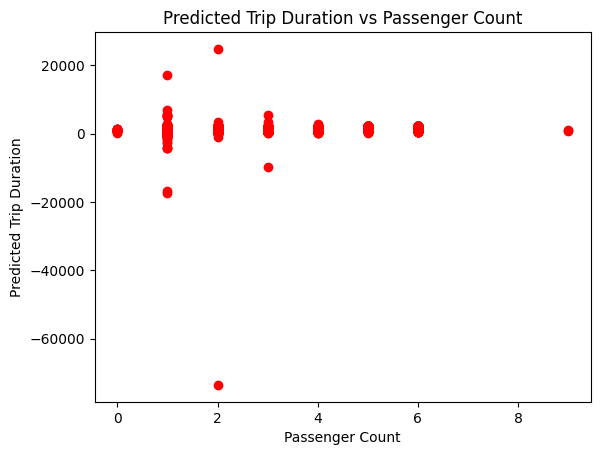

In [ ]:
#scatter plot of predicted trip duration against the number of passengers
plt.scatter(X_test[:, 3], y_pred, color='red')
plt.xlabel('Passenger Count')
plt.ylabel('Predicted Trip Duration')
plt.title('Predicted Trip Duration vs Passenger Count')
plt.show()

## Histogram to show relation between vendor id and passenger count

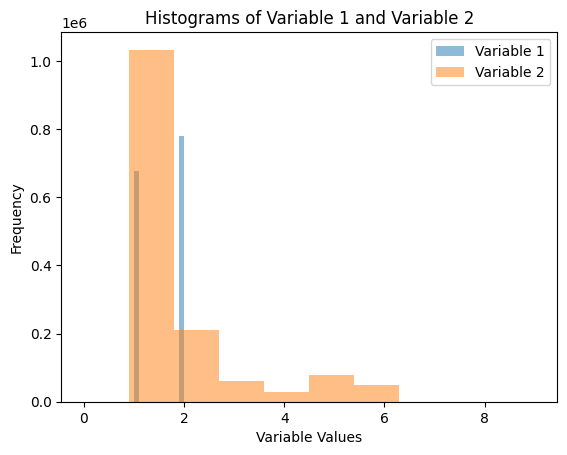

In [ ]:
variable1 = X_train[:, 2]  # Vendor id
variable2 = X_train[:, 3]  # Passenger count

plt.hist(variable1, bins=10, alpha=0.5, label='Variable 1')
plt.hist(variable2, bins=10, alpha=0.5, label='Variable 2')
plt.xlabel('Variable Values')
plt.ylabel('Frequency')
plt.title('Histograms of Variable 1 and Variable 2')
plt.legend()
plt.show()

# Box plot

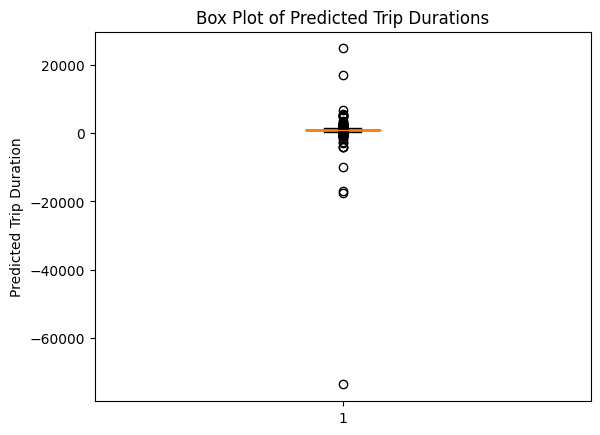

In [ ]:
#a box plot of predicted trip durations
plt.boxplot(y_pred)
plt.ylabel('Predicted Trip Duration')
plt.title('Box Plot of Predicted Trip Durations')
plt.show()
